Alumno: **Ginés González Guirado**

# Homework 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implemento la transformada de Fourier, en expresión compleja, utilizada en los Homeworks anteriores.

In [2]:
def ft2(v,m):
    D=np.size(v)
    N=D//2

    M=np.zeros((D,D),dtype=complex)
    A=np.zeros((D,D),dtype=complex)
    f=0
    for i in range(D):
        M[i,f]=1/np.sqrt(D)

    for k in range(1,N+1):
        f=f+1
        for i in range(D):
            M[i,f]=np.exp(1j*2*k*np.pi*i/D)/np.sqrt(D)
        f=f+1 
        if f<=(D-1):
            for i in range(D):
                M[i,f]=np.exp(-1j*2*k*np.pi*i/D)/np.sqrt(D)
    #M será la matriz para la transf inversa
    
    for i in range(D):
        for j in range(D):
            A[i,j]=M[j,i].conjugate()  # la matriz para la transf directa será la traspuesta
            
            
    if m==1:        
        f=np.sqrt(1/D)*np.dot(A,v) #si m=1 el resultado es la transf directa
        return f
    elif m==-1:
        f=np.sqrt(D)*np.dot(M,v) #si m=-1 el resultado es la transf inversa
        return f
    else:
        return print('entrada incorrecta: 1 directa, -1 inversa') #si m es disntinto de 1 o -1 ponemos un mensaje de error

He representado las transformadas solamente para $\omega$ positivo. Como la parte real es simétrica, para $\omega$ negativo sería igual. La parte imaginaria, al ser antisimétrica, para $\omega$ negativo simplemente obtendríamos el opuesto de lo representado.

**11.1** For the pulse shown in text Figure 11.3, compute the complex Fourier spectrum numerically using cDFT. Then normalize the spectrum by the frequency resolution of the spectrum as indicated in text Figure 11.4. Compare your numerical result with the theoretical spectrum w*sinc(wf).

Extend the observation interval from L=2 to L=20 while maintaining the same width of the pulse and same sampling rate. Repeat the calculations above.


Compare (what is the same?) and contrast (what is different?) the Fourier spectra for the L=2 and L=20 cases.

Defino la función que se muestra en la figura 11.3.

In [3]:
def rect(x):
    return 1 if abs(x)<=0.25 else 0

Tomo los puntos (20) para una longitud del intervalos L=2.

In [4]:
L=2     # Longitud del intervalo
D=20    # Numero de puntos que se toman
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L/2,L/2,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    g[i]=rect(x[i])
    
g

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [5]:
coeff=ft2(g,1)

In [6]:
N=D/2
a=np.zeros(11,dtype=complex)
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1

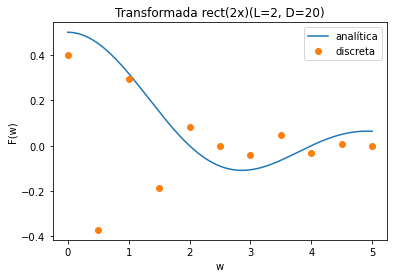

In [7]:
f=np.linspace(0,N/L,1000)
W=0.5*np.sinc(0.5*f)
N=D/2
F=np.arange(0,N/L+0.01,1/L)
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(a)*L,'o',label='discreta')
plt.title('Transformada rect(2x)(L=2, D=20)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.legend();

Tomo los puntos (200) para una longitud del intervalos L=20.

In [8]:
L=20
D=200
g=np.zeros(D)
x=np.linspace(-L/2,L/2,D)

for i in range(D):
    g[i]=rect(x[i])

In [9]:
coeff=ft2(g,1)

In [10]:
N=D/2
a=np.zeros(101,dtype=complex)
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1

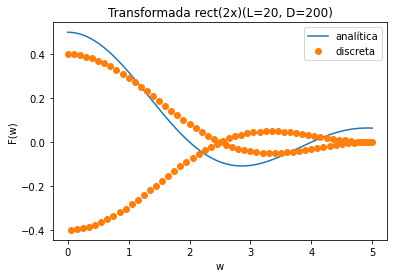

In [11]:
f=np.linspace(0,N/L,1000)
W=0.5*np.sinc(0.5*f)
N=D/2
F=np.arange(0,N/L+0.01,1/L)
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(a)*L,'o',label='discreta')
plt.title('Transformada rect(2x)(L=20, D=200)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.legend();

Como se puede apreciar la transformada discreta noo se ajusta bien a la transformada analítica, lo cual se debe a que la función rect es del tipo escalón y es difícil de parametrizar por Fourier, por ello voy a tratar de aumentar bastante el número de puntos del muestreo a ver si se consigue un mejor resultado.

Tomo los puntos (200) para una longitud del intervalos L=2.

In [12]:
L=2     # Longitud del intervalo
D=200   # Numero de puntos que se toman
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L/2,L/2,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    g[i]=rect(x[i])

g

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Hago la DFT directa y paso los coeficientes al espectro de frecuencias.

In [13]:
coeff=ft2(g,1)

In [14]:
N=D/2
a=np.zeros(101,dtype=complex)  # para coger los C_k con k positivo
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(50):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

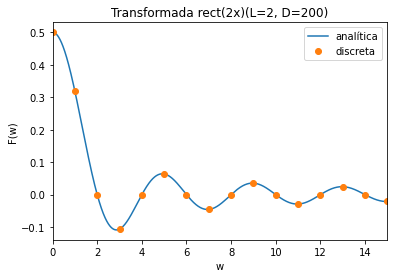

In [15]:
f=np.linspace(0,N/L,10000)     # puntos de frecuencias para graficar los coeficientes teoricos
W=0.5*np.sinc(0.5*f)           # Coeficientes teoricos
N=D/2
F=np.arange(0,N/L+0.01,2/L)    # puntos de frecuencias para graficar los coeficientes calculados computacionalmente
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.xlim([0,15])               #restringimos el ancho de banda para apreciar con mas detalle la funcion
plt.title('Transformada rect(2x)(L=2, D=200)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.legend();

Le he dado bastantes puntos (D=200) para hacer la DFT porque al hacer la Transformada de Fourier de una función escalón, si le damos pocos puntos no se ajusta bien a la analítica.

Tomo los puntos (2000) para una longitud del intervalos L=20.

In [16]:
L=20
D=2000
g=np.zeros(D)
x=np.linspace(-L/2,L/2,D)

for i in range(D):
    g[i]=rect(x[i])

In [17]:
coeff=ft2(g,1)

In [18]:
N=D/2
a=np.zeros(1001,dtype=complex)
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(501,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(500):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

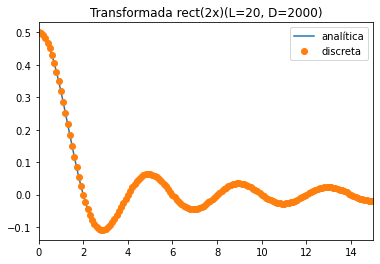

In [19]:
f=np.linspace(0,N/L,10000)
W=0.5*np.sinc(0.5*f)
N=D/2
F=np.arange(0,N/L+0.01,2/L)
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.title('Transformada rect(2x)(L=20, D=2000)')
plt.legend();

Al aumentar el número de puntos de muestreo se ha conseguido que las transformadas analítica y discreta coincidan.

Para conseguir que se ajuste la transformada discreta a la analítica en el intervalo L=20, tenemos que tomar muchos más puntos que para que se ajuste bien en el intervalo L=2.

**11.2** Repeat problem 11.1 for the Gaussian function $g(x) = exp(- \pi x^2)$. Note that this function is it's own Fourier transform. That is, $G(f) = exp(- \pi f^2)$.

In [31]:
def gauss(x):
    return np.exp(-np.pi*x**2)

Tomo los puntos (200) para una longitud del intervalos L=2.

In [32]:
L=2     # Longitud del intervalo
D=200   # Numero de puntos que se toman
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L/2,L/2,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    g[i]=gauss(x[i])

In [33]:
coeff=ft2(g,1)

In [34]:
N=D/2
a=np.zeros(101,dtype=complex)  # para coger los C_k con k positivo
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(50):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

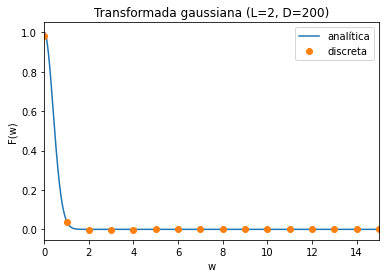

In [35]:
f=np.linspace(0,N/L,10000)     # puntos de frecuencias para graficar los coeficientes teoricos
W=np.exp(-np.pi*f**2)           # Coeficientes teoricos
N=D/2
F=np.arange(0,N/L+0.01,2/L)    # puntos de frecuencias para graficar los coeficientes calculados computacionalmente
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.title('Transformada gaussiana (L=2, D=200)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();

Tomo los puntos (200) para una longitud del intervalos L=20.

In [36]:
L=20    # Longitud del intervalo
D=200   # Numero de puntos que se toman
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L/2,L/2,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    g[i]=gauss(x[i])

In [37]:
coeff=ft2(g,1)

In [38]:
N=D/2
a=np.zeros(101,dtype=complex)  # para coger los C_k con k positivo
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(50):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

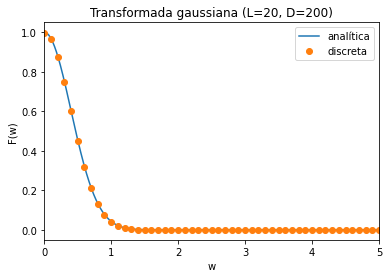

In [39]:
f=np.linspace(0,N/L,10000)     # puntos de frecuencias para graficar los coeficientes teoricos
W=np.exp(-np.pi*f**2)           # Coeficientes teoricos
N=D/2
F=np.arange(0,N/L+0.01,2/L)    # puntos de frecuencias para graficar los coeficientes calculados computacionalmente
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.title('Transformada gaussiana (L=20, D=200)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.xlim([0,5]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();

**11.3** Repeat problem 11.1 for the 1-sided exponential function $g(x) = exp(-|x|)$. Compare the numerical results with theory from Bracewell’s pictorial dictionary.

In [46]:
def exp1(x):
    if x<0:
        return 0
    if x>=0:
         return np.exp(-x)

Tomo los puntos (20) para una longitud del intervalos L=2.

In [47]:
L=2     # Longitud del intervalo
D=20    # Numero de puntos que se toman
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L/2,L/2,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    g[i]=exp1(x[i])

In [48]:
coeff=ft2(g,1)

In [49]:
N=D/2
a=np.zeros(11,dtype=complex)
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(6,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(11):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

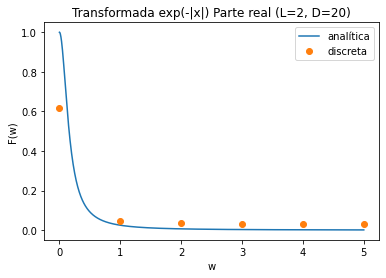

In [50]:
f=np.linspace(0,N/L,1000)
W=1/(1+4*np.pi**2*f**2)   #transformada (Bracewell pag 392) (parte real)
N=D/2
F=np.arange(0,N/L+0.01,2/L)
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte real (L=2, D=20)')
plt.legend();

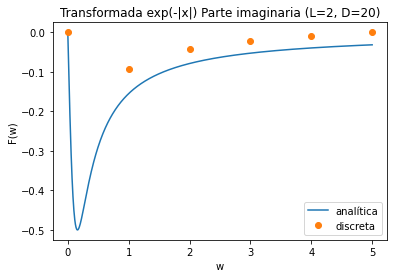

In [51]:
W=-2*np.pi*f/(1+4*np.pi**2*f**2)
plt.plot(f,W,label='analítica')
plt.plot(F,np.imag(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte imaginaria (L=2, D=20)')
plt.legend();

Tomo los puntos (200) para una longitud del intervalos L=20.

In [52]:
L=20
D=200
g=np.zeros(D)
x=np.linspace(-L/2,L/2,D)

for i in range(D):
    g[i]=exp1(x[i])

In [53]:
coeff=ft2(g,1)

In [54]:
N=D/2
a=np.zeros(101,dtype=complex)
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(101):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

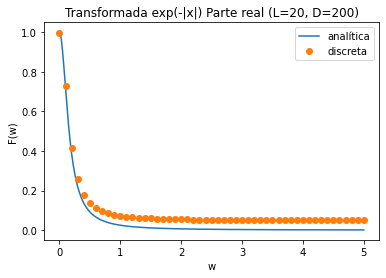

In [55]:
f=np.linspace(0,N/L,1000)
W=1/(4*np.pi**2*f**2+1)   #transformada (Bracewell pag 392)
N=D/2
F=np.arange(0,N/L+0.01,2/L)
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte real (L=20, D=200)')
plt.legend();

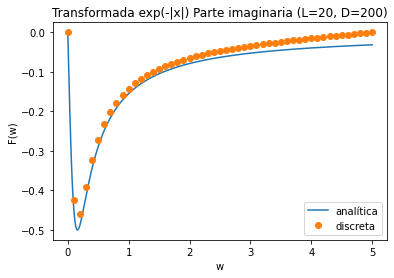

In [57]:
f=np.linspace(0,N/L,1000)
W=-2*np.pi*f/(1+4*np.pi**2*f**2)

N=D/2
F=np.arange(0,N/L+0.01,2/L)

plt.plot(f,W,label='analítica')
plt.plot(F,np.imag(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte imaginaria (L=20, D=200)')
plt.legend();

Como en el ejercicio 11.1, la transformada discreta no se ajusta bien a la solución analítica, por lo que probaré a tomar más puntos para comprobar si se ajusta mejor.

Tomo los puntos (200) para una longitud del intervalos L=2.

In [58]:
L=2
D=200
g=np.zeros(D)
x=np.linspace(-L/2,L/2,D)

for i in range(D):
    g[i]=exp1(x[i])

In [59]:
coeff=ft2(g,1)

In [60]:
N=D/2
a=np.zeros(101,dtype=complex)
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(11):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

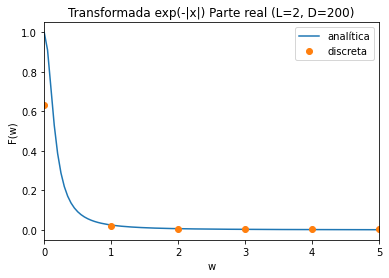

In [61]:
f=np.linspace(0,N/L,1000)
W=1/(4*np.pi**2*f**2+1)   #transformada (Bracewell pag 392)
N=D/2
F=np.arange(0,N/L+0.01,2/L)
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte real (L=2, D=200)')
plt.xlim(0,5) # representamos de 0 a 5 para que se vea mejor la forma de la función
plt.legend();

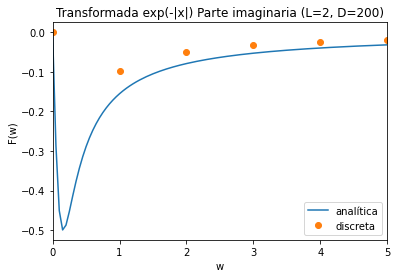

In [62]:
f=np.linspace(0,N/L,1000)
W=-2*np.pi*f/(1+4*np.pi**2*f**2)

N=D/2
F=np.arange(0,N/L+0.01,2/L)

plt.plot(f,W,label='analítica')
plt.plot(F,np.imag(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte imaginaria (L=2, D=200)')
plt.xlim(0,5)
plt.legend();

Tomo los puntos (2000) para una longitud del intervalos L=20.

In [63]:
L=20
D=2000
g=np.zeros(D)
x=np.linspace(-L/2,L/2,D)

for i in range(D):
    g[i]=exp1(x[i])

In [64]:
coeff=ft2(g,1)

In [65]:
N=D/2
a=np.zeros(1001,dtype=complex)
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(501,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(500):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

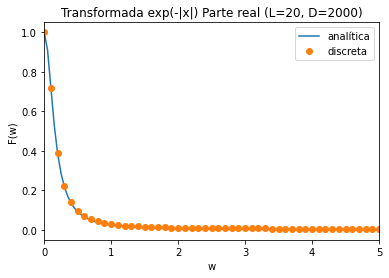

In [66]:
f=np.linspace(0,N/L,1000)
W=1/(4*np.pi**2*f**2+1)   #transformada (Bracewell pag 392)
N=D/2
F=np.arange(0,N/L+0.01,2/L)
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte real (L=20, D=2000)')
plt.xlim(0,5) # representamos de 0 a 5 para que se vea mejor la forma de la función
plt.legend();

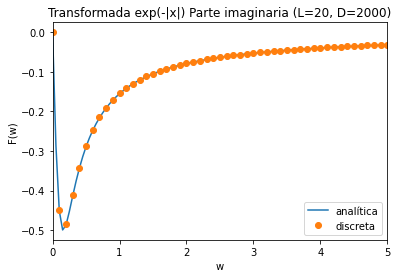

In [67]:
f=np.linspace(0,N/L,1000)
W=-2*np.pi*f/(1+4*np.pi**2*f**2)

N=D/2
F=np.arange(0,N/L+0.01,2/L)

plt.plot(f,W,label='analítica')
plt.plot(F,np.imag(b)*L,'o',label='discreta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.title('Transformada exp(-|x|) Parte imaginaria (L=20, D=2000)')
plt.xlim(0,5) #representamos para w de 0 a 5 para ver mejor la función
plt.legend(loc="lower right");

Se puede comprobar que al aumentar el número de puntos la transformada se ajusta cada vez mejor. Los resultados numéricos coinciden con la imagen de la transformada de la función que aparece en la página 392 del Bracewell.